In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
os.chdir('/content/drive/MyDrive/AI_Advanced_CK/NLP/2_IMDB_reviews')

## Dataset

In [7]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXR3JVX/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXR3JVX/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXR3JVX/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [8]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']
train_sentences = []
test_sentences = []
train_labels = []
test_labels = []

In [9]:
# first_element = next(iter(train_data.take(1)))

In [10]:
for s,l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())
for s,l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [11]:
print(len(train_sentences))
print(len(train_labels))

25000
25000


In [12]:
# Thêm phần tử mới vào train_sentences và train_labels
# s = 'Nguyen Van Manh'
s = 'Nguyễn Văn Mạnh'
train_sentences.append(s)
l = 1
train_labels = np.append(train_labels, l)

print(train_sentences[-1])
print(train_labels[-1])

Nguyễn Văn Mạnh
1


In [13]:
print(len(train_sentences))
print(len(train_labels))
print(train_sentences[0])
print(train_labels[0])
print(train_labels) # label chỉ có 2 nhãn : 0 và 1

25001
25001
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
[0 0 0 ... 0 1 1]


In [14]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Parameters

In [15]:
vocab_size = 10000
embedding = 64
max_length = 120
embedding_dim = 128  # Kích thước vector nhúng

## Tokenizer

In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Thử nghiệm với các giá trị khác nhau của vocab_size
# vocab_sizes = [5000, 10000, 20000]

# for vocab_size in vocab_sizes:
#     tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
#     tokenizer.fit_on_texts(train_sentences)

#     # Chuyển đổi các câu thành các chuỗi số
#     train_sequences = tokenizer.texts_to_sequences(train_sentences)

#     # Đệm các chuỗi để có độ dài bằng nhau
#     padded_sequences = pad_sequences(train_sequences, maxlen=100, padding='post')

#     print(f"Vocabulary Size: {vocab_size}")
#     print(f"Example of padded sequences: {padded_sequences[:2]}")
#     print(f"Number of unique tokens: {len(tokenizer.word_index)}")
#     print("-" * 50)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer (num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts (train_sentences + test_sentences + ['Nguyễn Văn Mạnh'])

In [17]:
train_sentences_seq = tokenizer.texts_to_sequences(train_sentences)
padded_train_sentences = pad_sequences (train_sentences_seq, maxlen=max_length, truncating='post', padding='post')

In [18]:
word_index = tokenizer.word_index
len(tokenizer.word_index)

120809

In [19]:
print(word_index['romance'])
print(word_index['nguyen'])
print(word_index['van'])
# đầu vào là 'Nguyễn Văn Mạnh'
print(word_index['nguyễn'])
print(word_index['văn'])
print(word_index['mạnh']) # sẽ chuyển thành in thường hết

900
28201
1090
65341
65342
65343


In [20]:
# Từ index lấy ra word
reverse_word_index = {index: word for word, index in word_index.items()}
print(reverse_word_index[900])
print(reverse_word_index[28201])
print(reverse_word_index[1090])
print(reverse_word_index[65341])
print(reverse_word_index[65342])
print(reverse_word_index[65343])

romance
nguyen
van
nguyễn
văn
mạnh


In [35]:
test_sentences_max = tokenizer.texts_to_matrix(test_sentences)

In [36]:
print(test_sentences_max.shape)

(25000, 10000)


In [21]:
test_sentences_seq = tokenizer.texts_to_sequences (test_sentences)
padded_test_sentences = pad_sequences(test_sentences_seq, maxlen=max_length, truncating='post', padding='post')

In [22]:
print(len(test_sentences[0]))
print(test_sentences[0])

942
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."


In [23]:
padded_test_sentences

array([[  59,   44,   25, ..., 1133,    2, 5475],
       [  59,    4,    1, ...,  347,    1,  190],
       [   1,   16,  312, ..., 1412,   39,    4],
       ...,
       [  59,   92,    1, ...,  114,  724,  101],
       [  59,  104,  635, ...,    0,    0,    0],
       [  59,   34,   42, ...,    0,    0,    0]], dtype=int32)

In [24]:
padded_test_sentences.shape

(25000, 120)

In [25]:
print(len(padded_test_sentences[0]))

120


## Model using only one Embedding layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Flatten
model = Sequential()
model.add(Embedding(vocab_size, embedding, input_length = max_length)) # embedding ở đây chính là output_dim
model.add(Flatten())
# model.add(LSTM(embedding)) # embedding node ẩn ???
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 256, 64)           640000    
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_23 (Dense)            (None, 10)                163850    
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 803861 (3.07 MB)
Trainable params: 803861 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model using Simple RNN

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN, Dense

# model = Sequential()
# model.add(SimpleRNN(units=embedding, input_shape=(max_length, vocab_size)))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.summary()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding, input_length=max_length))
model.add(SimpleRNN(units=128))
model.add(Dense(1, activation='sigmoid'))

# optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 256, 64)           7731840   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7756673 (29.59 MB)
Trainable params: 7756673 (29.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model using LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(10, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 120, 64)           640000    
                                                                 
 lstm_5 (LSTM)               (None, 128)               98816     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 740117 (2.82 MB)
Trainable params: 740117 (2.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Phuc_Save_Model/LSTM_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
H = lstm_model.fit(padded_train_sentences, train_labels, epochs=10, batch_size=128,
                            validation_data=(padded_test_sentences, test_labels),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
196/196 [==============================] - ETA: 0s - loss: 0.6753 - acc: 0.5497

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model.add(LSTM(64, return_sequences=True, activation='relu'))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

# model.summary()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=128))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# model.summary()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense

# model = Sequential()
# model.add(Embedding(vocab_size, embedding, input_length=max_length))
# model.add(LSTM(64))  # LSTM layer with 64 units
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# model.summary()

## Model using BiLSTM

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization

# Tạo mô hình BiLSTM
bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, embedding, input_length=max_length))

bilstm_model.add(Bidirectional(LSTM(128)))
bilstm_model.add(Dropout(0.3))
bilstm_model.add(BatchNormalization())

# Lớp đầu ra
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình với learning rate điều chỉnh
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
bilstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Tóm tắt mô hình
bilstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 64)           640000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 256)               197632    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 32)                8224      
                                                                 
 dense_9 (Dense)             (None, 1)                

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Create BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, embedding, input_length=max_length))
bilstm_model.add(Bidirectional(LSTM(128)))

bilstm_model.add(Dense(10, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bilstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 64)           640000    
                                                                 
 bidirectional (Bidirection  (None, 256)               197632    
 al)                                                             
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 840213 (3.21 MB)
Trainable params: 840213 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Phuc_Save_Model/BiLSTM_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
H = bilstm_model.fit(padded_train_sentences, train_labels, epochs=10, batch_size=128,
                            validation_data=(padded_test_sentences, test_labels),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
196/196 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.7450
Epoch 1: val_loss improved from inf to 0.59210, saving model to ./Phuc_Save_Model/BiLSTM_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 40s 184ms/step - loss: 0.4900 - accuracy: 0.7450 - val_loss: 0.5921 - val_accuracy: 0.7165
Epoch 2/10
196/196 [==============================] - ETA: 0s - loss: 0.2979 - accuracy: 0.8762
Epoch 2: val_loss improved from 0.59210 to 0.51327, saving model to ./Phuc_Save_Model/BiLSTM_model.h5
196/196 [==============================] - 17s 88ms/step - loss: 0.2979 - accuracy: 0.8762 - val_loss: 0.5133 - val_accuracy: 0.7297
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.9066
Epoch 3: val_loss improved from 0.51327 to 0.44040, saving model to ./Phuc_Save_Model/BiLSTM_model.h5
196/196 [==============================] - 11s 56ms/step - loss: 0.2326 - accuracy: 0.9066 - val_loss: 0.4404 - val_accuracy: 0.8112
Epoch 4/10
196/196 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 0.9351
Epoch 4: val_loss did not improve from 0.44040
196/196 [==============================] - 8s 39ms/step - los

## Training

In [ ]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Phuc_Save_Model/RNN_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
H = model.fit(padded_train_sentences, train_labels, epochs=10,
                            validation_data=(padded_test_sentences, test_labels),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 0.6945 - acc: 0.5021
Epoch 1: val_loss improved from inf to 0.69530, saving model to ./Phuc_Save_Model/RNN_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 148s 189ms/step - loss: 0.6945 - acc: 0.5021 - val_loss: 0.6953 - val_acc: 0.5044
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 0.6925 - acc: 0.5119
Epoch 2: val_loss did not improve from 0.69530
782/782 [==============================] - 142s 181ms/step - loss: 0.6925 - acc: 0.5119 - val_loss: 0.6963 - val_acc: 0.5016
Epoch 3/10
782/782 [==============================] - ETA: 0s - loss: 0.6920 - acc: 0.5176
Epoch 3: val_loss did not improve from 0.69530
782/782 [==============================] - 136s 174ms/step - loss: 0.6920 - acc: 0.5176 - val_loss: 0.6971 - val_acc: 0.5001
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 0.6906 - acc: 0.5209
Epoch 4: val_loss did not improve from 0.69530
782/782 [==============================] - 145s 185ms/step - loss: 0.6906 - acc: 0.5209 - val_loss: 0.6986 - val_acc: 0.5007
Training History: {'loss': [0.694536566734314, 0.6925192475318909, 0.6919538974761963,

In [ ]:
model.fit(padded_train_sentences, train_labels, epochs=10, batch_size=128, validation_data=(padded_test_sentences, test_labels))

In [ ]:
# model.fit(padded_train_sentences, train_labels, epochs=10, validation_data= (padded_test_sentences, test_labels))

In [ ]:
!nvidia-smi

Sat May 25 08:32:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              31W /  70W |   1071MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# import numpy as np
# # Chuyển đổi dữ liệu nhãn thành mảng NumPy
# train_labels = np.array(train_labels)
# test_labels = np.array(test_labels)
# # Tiếp tục sử dụng phương thức fit
# model.fit(padded_test_sentences, train_labels, epochs=10, validation_data=(padded_test_sentences, test_labels))

In [ ]:
test_sen = ['i hate this movie']
test_seq = tokenizer.texts_to_sequences (test_sen)
padded_test_seq=pad_sequences(test_seq, maxlen = max_length, truncating='post', padding='post')
padded_test_seq

array([[ 11, 797,  12,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
padded_test_seq.shape

(1, 256)

In [ ]:
result = model.predict(padded_test_seq)
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape # (10000, 64) thì 64 chính là embeding

1/1 [==============================] - 0s 95ms/step


(10000, 64)

In [ ]:
print(result)

[[0.7139964]]


In [ ]:
# import io
# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')

In [ ]:
# Test the model with an additional sentence
additional_test_sen = ['it is so bad']   #i hate this movie    #this movie is amazing
additional_test_seq = tokenizer.texts_to_sequences(additional_test_sen)
padded_additional_test_seq = pad_sequences(additional_test_seq, maxlen=max_length, truncating='post', padding='post')

# Predict sentiment of the additional test sentence
additional_prediction = model.predict(padded_additional_test_seq)

# Round the sentiment prediction to get binary output
binary_prediction = 1 if additional_prediction >= 0.5 else 0
print(f"Binary sentiment prediction for '{additional_test_sen[0]}':", binary_prediction)

1/1 [==============================] - 0s 20ms/step
Binary sentiment prediction for 'it is so bad': 0


WEIGHT

In [ ]:
# Tìm trọng số của một từ cụ thể trong từ điển
position = tokenizer.texts_to_sequences (['Mạnh'])
weights[position]

array([[[ 0.02415286, -0.03893019,  0.02940716, -0.01542135,
          0.00906122, -0.04000865,  0.03875595, -0.07261197,
          0.02921862,  0.05564582,  0.03091285,  0.00163267,
         -0.01256503,  0.00867441,  0.00352071, -0.03451563,
          0.02901946, -0.00722421,  0.02056909, -0.04423298,
         -0.02023596, -0.03960237, -0.05726715,  0.01719216,
         -0.00876812, -0.06003033,  0.00799106, -0.00223789,
          0.02676872, -0.02003199,  0.01968102, -0.00586209,
         -0.05143035, -0.03921697,  0.01182734, -0.00467086,
          0.03892567, -0.03763102, -0.01850111, -0.0014971 ,
         -0.01124514,  0.05640443,  0.0531498 ,  0.01283238,
          0.0040586 , -0.02332836, -0.07738928,  0.04579325,
          0.02408528, -0.01730792, -0.00491061, -0.03229458,
         -0.00147123,  0.00741822,  0.03042232,  0.00876312,
         -0.00593594, -0.00111849, -0.04115054,  0.04124575,
         -0.05938125,  0.01204226, -0.00824407,  0.0206407 ]]],
      dtype=float32)

## Kết quả


- Model only Embedding layer được 0.85 sau 4 epochs, acc_train 1
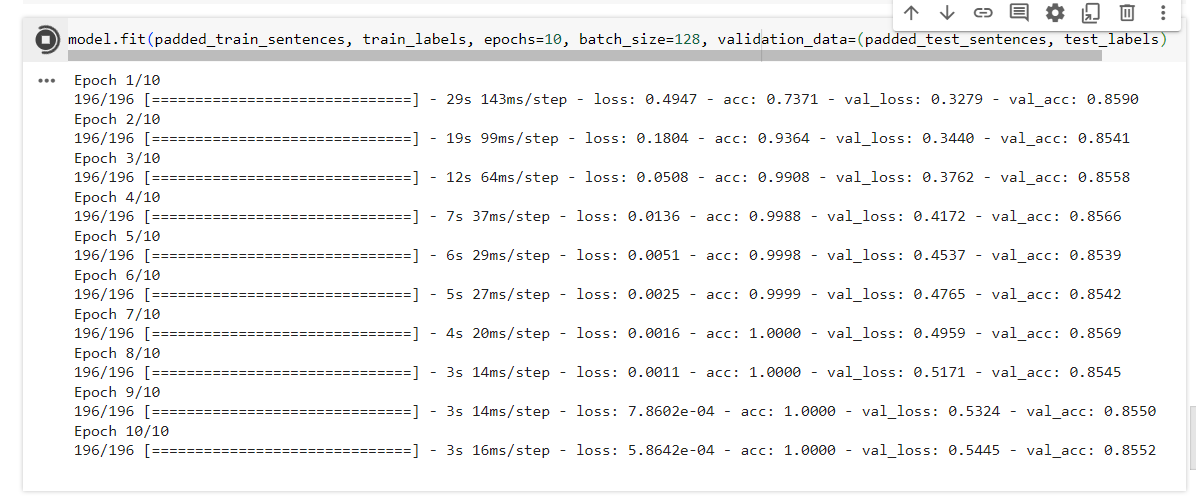